In [2]:
import numpy as np
import matplotlib.pyplot as plt

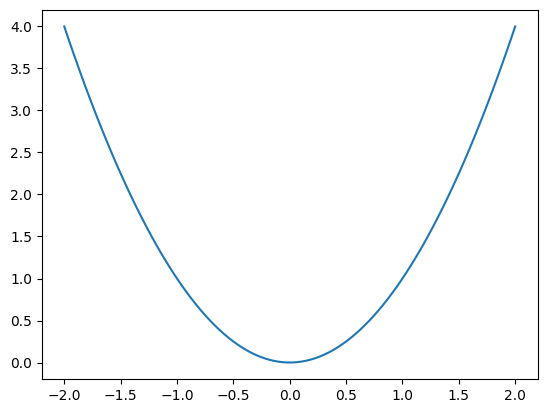

In [3]:
def f(x):
    return x ** 2

x = np.linspace(-2, 2, 100)
_ = plt.figure()
plt.plot(x, f(x))
plt.show()


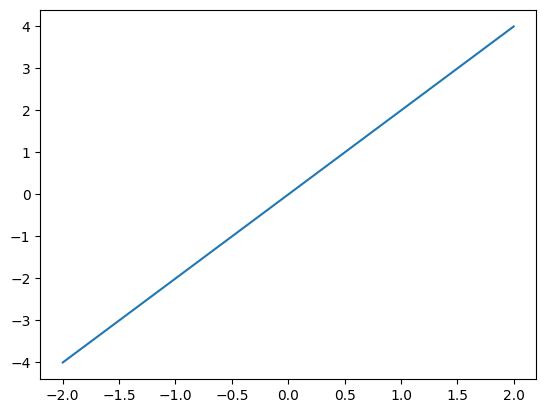

In [4]:
def df(x):
    return 2 * x

x = np.linspace(-2, 2, 100)
_ = plt.figure()
plt.plot(x, df(x))
plt.show()

In [5]:
def gradient_descent(df, x0, learning_rate = 0.01, num_iterations = 100):
    x = [x0]
    for _ in range(num_iterations):
        x1 = x[-1]
        gradient = df(x1)
        x2 = x1 - learning_rate * gradient
        x.append(x2)
    return x

y = f(x)

In [6]:
x0 = -10
learning_rate = 0.05
n_iterations = 100

x = gradient_descent(df, x0, learning_rate, n_iterations)


In [7]:
# xi = np.linspace(-12, -12, 500)
# yi = f(x)

# _ = plt.figure(figsize=(10, 10))
# plt.plot(xi, yi, label = "f(x) = x^2")
# plt.scatter(x, y, color = "magenta")
# plt.plot(x, y, color = "magenta", linestyle = "--")
# plt.legend()
# plt.grid()
# plt.show()


In [8]:
def f(x, y):
    return x ** 2 + y ** 2

def df(x, y):
    dfdx = 2 * 2
    dfdy = 2 * y

    return np.array([dfdx, dfdy])

In [9]:
def gradient_descent_2d(df, x0, learning_rate, n_iterations):
    points = [x0]
    for _ in range(n_iterations):
        current_point = points[-1]
        gradient = df(current_point[0], current_point[1])
        next_point = current_point - learning_rate * gradient
        points.append(current_point)
    return np.array(points)

In [10]:
starting_point = np.array([-10, -10])
learning_rate = 0.001
n_iterations = 100

points = gradient_descent_2d(df, starting_point, learning_rate, n_iterations)

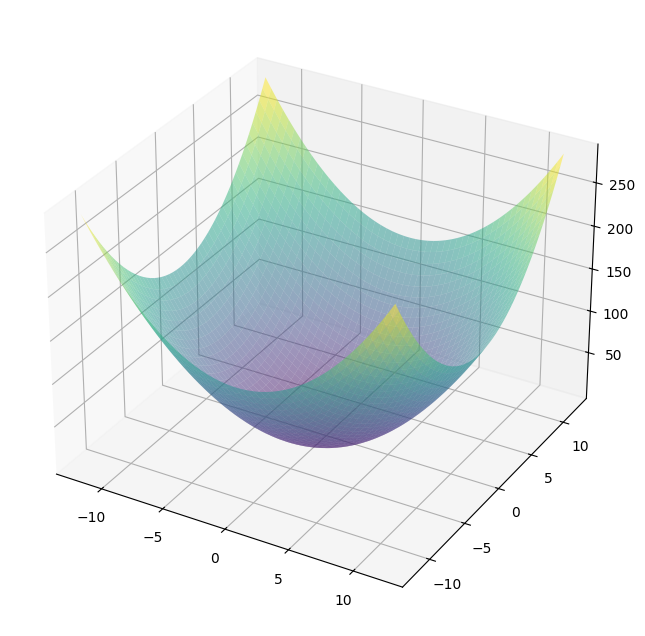

In [11]:
x = np.linspace(-12, 12, 500)
y = np.linspace(-12, 12, 500)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(x, y, z, alpha = 0.5, cmap="viridis")

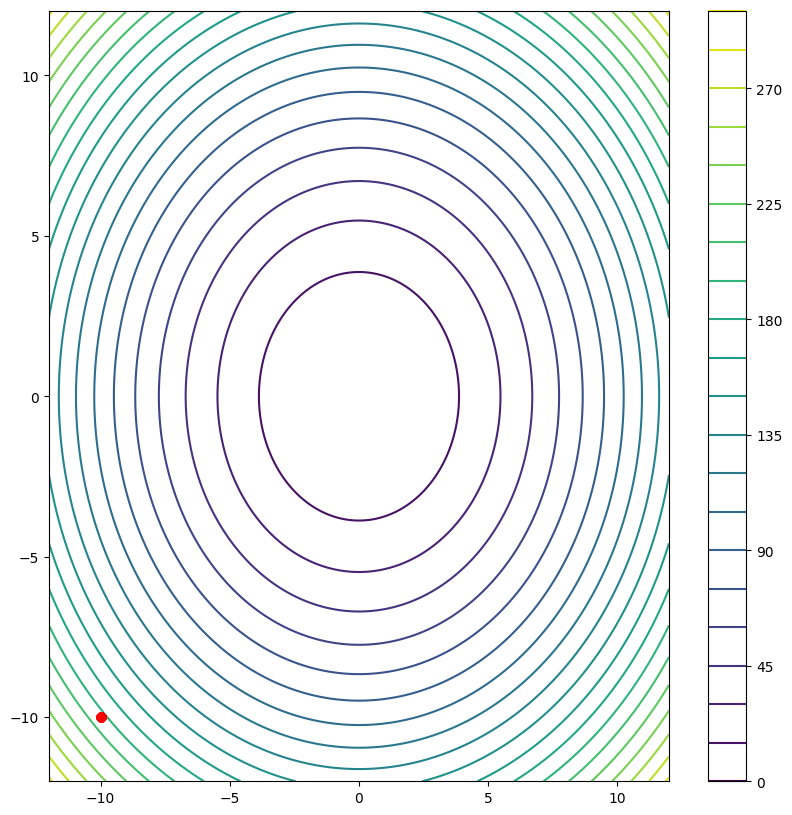

In [12]:
_ = plt.figure(figsize=(10, 10))
plt.contour(x, y, z, cmap="viridis", levels = 20)
plt.colorbar()
plt.plot(points[:, 0], points[:, 1], "r-o")
plt.show()

In [13]:
mingf = f(points[-1, 0], points[-1, 1])
print(f"{mingf} at x = {points[-1, 0]}, y = {points[-1, 1]}")

200 at x = -10, y = -10


In [14]:
from matplotlib.pyplot import grid


def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def gradient_descent_2d(f, grid_x, grid_y, starting_point, learning_rate, n_iterations):
    z = f(grid_x, grid_y)
    dx = grid_x[0, 1] - grid_x[0, 0]
    dy = grid_y[1, 0] - grid_y[0, 0]
    grad_x, grad_y = np.gradient(z, dx, dy, edge_order = 2)

    points = [starting_point]
    for _ in range(n_iterations):
        current_point = points[-1]
        ix = np.argmin(np.abs(grid_x[0, :] - current_point[0]))
        iy = np.argmin(np.abs(grid_y[:, 0] - current_point[1]))

        gradient = np.array([grad_x[iy, ix], grad_y[iy, ix]])

        next_point = current_point - learning_rate * gradient
        points.append(next_point)
    return np.array(points)

In [15]:
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


In [16]:
starting_point = np.array([-1.0, -1.0])
learning_rate = 0.01
n_iterations = 50

points = gradient_descent_2d(f, X, Y, starting_point, learning_rate, n_iterations)  


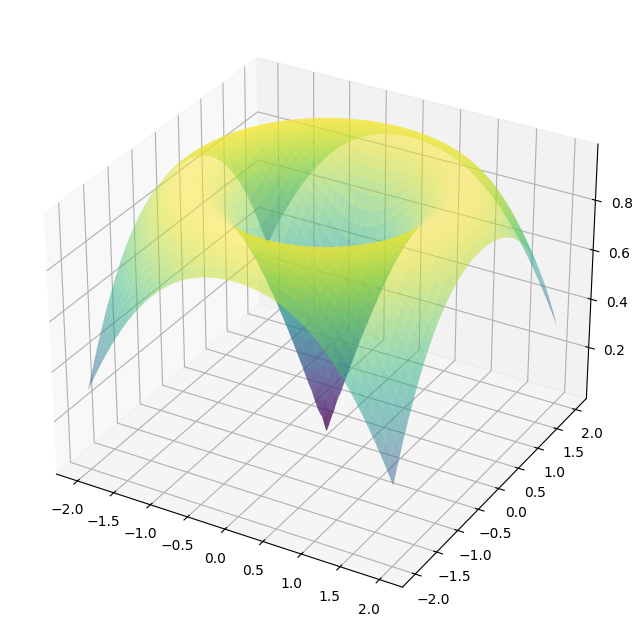

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, alpha = 0.5, cmap="viridis")
plt.show()